$$
Z_{LC} = \frac{\frac{1}{i\omega C_0} i\omega (L_0 + \frac{L_J}{\cos{2\pi\phi}})}{\frac{1}{i\omega C_0} + i\omega (L_0 + \frac{L_J}{\cos{2\pi\phi}})}
$$


$$
Z_{LC} = \frac{\frac{1}{i\omega C_0} i\omega L_0}{\frac{1}{i\omega C_0} + i\omega L_0}
$$


$$
Z_{LC} = \frac{\frac{1}{i\omega C_0} i\omega L_0}{\frac{1}{i\omega C_0} + i\omega L_0}\left(\frac{i\omega C_0}{i\omega C_0}\right) = \frac{i\omega L_0}{1 - \omega^2C_0L_0} = \frac{i\omega L_0}{1 - (\omega/\omega_0)^2}
$$
$$
\omega_0 = \frac{1}{\sqrt{L_0C_0}}
$$

$$
Z_{\Sigma} = \frac{1}{i\omega C_{in}} + \frac{i\omega L_0}{1 - \omega^2C_0L_0} = \frac{i\omega L_0}{1 - (\omega/\omega_0)^2}
$$

In [220]:
# load needed python libraries matplotlib, numpy, and scikit-rf
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf
import json
from skrf.media import *
from skrf import Frequency
from scipy.optimize import curve_fit


In [13]:
data_corrected = rf.read_all('jpa-nopump-scan2-s1p-corrected')

In [20]:
fghz = data_corrected['trace0'].f/1e9
file_object = open("biaswave.json", "r")
period = 1.85
biaswave = json.loads(file_object.read())
file_object.close()
biaswave = np.array(biaswave)
phiwave = biaswave/period

In [162]:
def jpa_func_f_complex(frequencyghz, CinpF, C0pF, L0pH, fghz_360):
    Cin = CinpF*1e-12
    C0 = C0pF*1e-12
    L0 = L0pH*1e-12
    omega = 2*np.pi*frequencyghz*1e9
    Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*L0)/(1 - omega*omega*C0*L0)
    s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
    angle_jpa = 180*np.angle(s_jpa)/np.pi
    angle_jpa = angle_jpa - 360*frequencyghz/fghz_360
    return angle_jpa

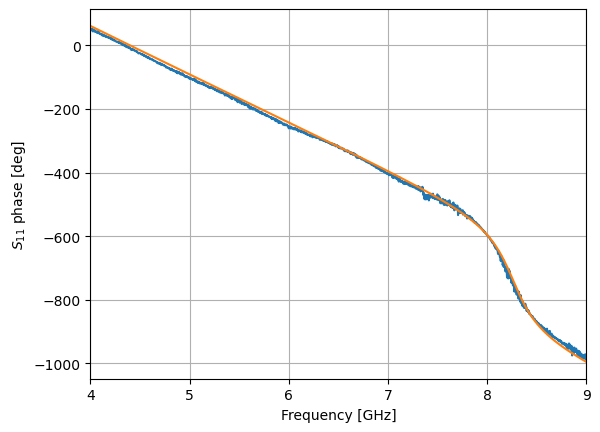

In [194]:
plt.plot(fghz,data_corrected['trace900'].s_deg_unwrap[:,0,0])
plt.xlim(fghz[0],fghz[len(fghz)- 1])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ phase [deg]')
plt.plot(fghz,np.unwrap(jpa_func_f_complex(fghz,1,7,52,2.6),period = 360) + 360 + 180)

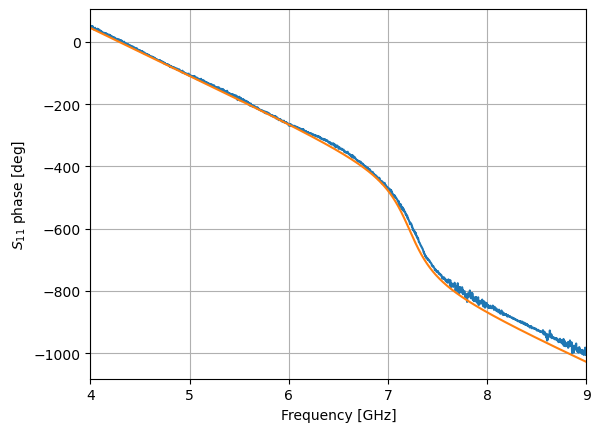

In [214]:
plt.plot(fghz,data_corrected['trace800'].s_deg_unwrap[:,0,0])
plt.xlim(fghz[0],fghz[len(fghz)- 1])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ phase [deg]')
plt.plot(fghz,np.unwrap(jpa_func_f_complex(fghz,1.2,7,68,2.58),period = 360) + 360 + 180)

In [230]:
popt, pcov = curve_fit(jpa_func_f_complex, fghz, data_corrected['trace800'].s_deg[:,0,0],p0=[1.2,7,68,2.58],bounds=((1,6,65,2),(2,8,75,3)))


In [232]:
popt

array([ 1.00000202,  6.00012824, 65.00061589,  2.99999858])